In [2]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [7]:
#import the libraries
import requests
import string
import re

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

# !pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [14]:
#import dataset
web = requests.get('https://aceh.antaranews.com/').text
web

'<!doctype html>\n<html>\n<head>\n  <meta charset="utf-8">\n   <title>Berita Aceh Terkini</title>\n  <meta name="keywords" content="berita aceh, berita terkini aceh, portal berita aceh">\n  <meta name="description" content="">\n   \n  <meta name="author" content="ANTARA News Agency">\n  <meta class="viewport" name="viewport" content="width=device-width, initial-scale=1.0">  <script>\n  (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n  })(window,document,\'script\',\'//www.google-analytics.com/analytics.js\',\'ga\');\n  ga(\'create\', \'UA-5465913-39\', \'auto\');\n  ga(\'send\', \'pageview\');\n</script>  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n  <!-- Favicon -->\n  <link rel="shortcut icon" href="https://aceh.antaranews.com/img/fav.ico" type="image/x-icon" />\n  <!-- \n  <li

In [15]:
#clean data
soup = BeautifulSoup(web)
for s in soup(['script', 'style']):
  s.decompose()
teks = ' '.join(soup.stripped_strings)
print(teks)

Berita Aceh Terkini Top News Terkini Rilis Pers Antaranews.com Tentang Kami Jumat, 2 Juni 2023 Home Nusantara antaranews.com Aceh/NAD Bali Bangka/Belitung Banten Bengkulu Gorontalo Jambi Jawa Barat Jawa Tengah Jawa Timur Kalimantan Barat Kalimantan Selatan Kalimantan Tengah Kalimantan Timur Kalimantan Utara Kepulauan Riau Kuala Lumpur Lampung Maluku Megapolitan NTB NTT Papua Papua Barat Riau Sulawesi Selatan Sulawesi Tengah Sulawesi Tenggara Sulawesi Utara Sumatera Barat Sumatera Selatan Sumatera Utara Yogyakarta Nasional Polisi diminta tangkap pembakar balai pengajian Muhammadiyah di Aceh 31 Mei 2023 23:25 Belasan warga binaan Lapas Lhoksukon Aceh Utara positif narkoba 30 Mei 2023 17:44 Polisi razia Lapas Lhoksukan Aceh sita gawai dari tersangka korupsi 30 Mei 2023 17:14 Kasus suap MA, Hakim Agung Sudrajad Dimyati divonis delapan tahun penjara 30 Mei 2023 12:45 Ribuan warga meriahkan Bukittinggi Bershalawat bersama UAS 28 Mei 2023 13:42 Daerah Banda Aceh Aceh Besar Aceh Barat Aceh Jay

In [16]:
#convert all string to lowercase
teks = teks.lower()

#delete all number in string
teks = re.sub(r"\d+", "", teks)

#delete all punctuation
teks = teks.translate(str.maketrans("", "", string.punctuation))

#delete the empty string
teks = teks.strip()

In [17]:
#convert the sentence to be a stemming word
factory = StemmerFactory()
stemmer = factory.create_stemmer()
output = stemmer.stem(teks)
print(output)

berita aceh kini top news kini rilis pers antaranewscom tentang kami jumat juni home nusantara antaranewscom acehnad bal bangkabelitung banten bengkulu gorontalo jambi jawa barat jawa tengah jawa timur kalimantan barat kalimantan selatan kalimantan tengah kalimantan timur kalimantan utara pulau riau kuala lumpur lampung malu megapolitan ntb ntt papua papua barat riau sulawesi selatan sulawesi tengah sulawesi tenggara sulawesi utara sumatera barat sumatera selatan sumatera utara yogyakarta nasional polisi minta tangkap bakar balai aji muhammadiyah di aceh mei bas warga bina lapas lhoksukon aceh utara positif narkoba mei polisi razia lapas lhoksukan aceh sita gawai dari sangka korupsi mei kasus suap ma hakim agung sudrajad dimyati vonis delapan tahun penjara mei ribu warga riah bukittinggi bershalawat sama uas mei daerah banda aceh aceh besar aceh barat aceh jaya aceh selatan aceh tengah aceh timur bireuen aceh utara lhokseumawe lain aceh tenggara kab aceh singkil dpra kota sabang kota s

In [18]:
tokens = [t for t in output.split()]
print(tokens)

['berita', 'aceh', 'kini', 'top', 'news', 'kini', 'rilis', 'pers', 'antaranewscom', 'tentang', 'kami', 'jumat', 'juni', 'home', 'nusantara', 'antaranewscom', 'acehnad', 'bal', 'bangkabelitung', 'banten', 'bengkulu', 'gorontalo', 'jambi', 'jawa', 'barat', 'jawa', 'tengah', 'jawa', 'timur', 'kalimantan', 'barat', 'kalimantan', 'selatan', 'kalimantan', 'tengah', 'kalimantan', 'timur', 'kalimantan', 'utara', 'pulau', 'riau', 'kuala', 'lumpur', 'lampung', 'malu', 'megapolitan', 'ntb', 'ntt', 'papua', 'papua', 'barat', 'riau', 'sulawesi', 'selatan', 'sulawesi', 'tengah', 'sulawesi', 'tenggara', 'sulawesi', 'utara', 'sumatera', 'barat', 'sumatera', 'selatan', 'sumatera', 'utara', 'yogyakarta', 'nasional', 'polisi', 'minta', 'tangkap', 'bakar', 'balai', 'aji', 'muhammadiyah', 'di', 'aceh', 'mei', 'bas', 'warga', 'bina', 'lapas', 'lhoksukon', 'aceh', 'utara', 'positif', 'narkoba', 'mei', 'polisi', 'razia', 'lapas', 'lhoksukan', 'aceh', 'sita', 'gawai', 'dari', 'sangka', 'korupsi', 'mei', 'kasus

In [19]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

berita:1
aceh:137
top:3
news:8
rilis:3
pers:1
antaranewscom:2
jumat:5
juni:23
home:1
nusantara:1
acehnad:1
bal:1
bangkabelitung:1
banten:1
bengkulu:1
gorontalo:1
jambi:1
jawa:3
barat:21
timur:11
kalimantan:5
selatan:12
utara:10
pulau:3
riau:2
kuala:1
lumpur:1
lampung:1
malu:1
megapolitan:1
ntb:1
ntt:1
papua:2
sulawesi:4
tenggara:8
sumatera:4
yogyakarta:1
nasional:3
polisi:5
tangkap:8
bakar:11
balai:3
aji:1
muhammadiyah:1
mei:63
bas:6
warga:12
bina:7
lapas:8
lhoksukon:3
positif:2
narkoba:6
razia:6
lhoksukan:1
sita:2
gawai:1
sangka:11
korupsi:18
suap:1
ma:1
hakim:2
agung:1
sudrajad:1
dimyati:1
vonis:1
delapan:1
penjara:1
ribu:3
riah:8
bukittinggi:1
bershalawat:1
uas:1
daerah:30
banda:9
jaya:7
bireuen:7
lhokseumawe:12
kab:6
singkil:6
dpra:4
kota:16
sabang:7
subulussalam:5
langsa:7
abdya:7
nagan:11
raya:13
perintah:6
kabupaten:4
tamiang:6
bener:6
gayo:1
lues:1
pidie:2
pemkab:11
simuelu:1
teknologi:6
kampus:4
guru:4
operasi:4
sepeda:2
listrik:7
acer:1
hadir:1
laptop:1
gaming:1
spesifikasi:1

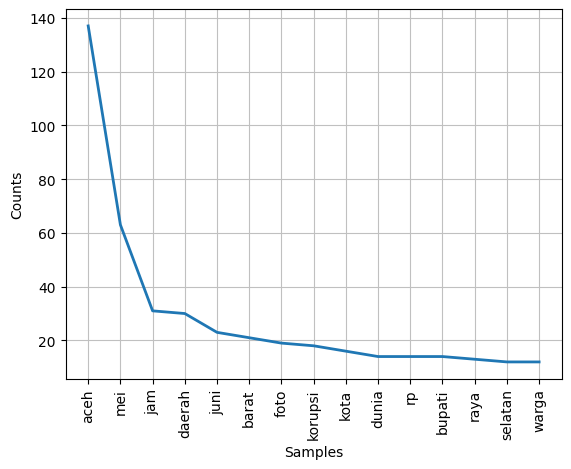

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('indonesian'):
    clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print(str(key) + ":" + str(val))

freq.plot(15)